# Evaluación de gastos de una aseguradora
### Información del autor
- Martín Michael De Lojo
- martinmdl42@gmail.com
- Matemática 3
- Tecnicatura en Programación Informática
- Universidad de San Martín
- Primer cuatrimestre del 2023

### Información del analisis
- Base de datos: [insurance.csv](https://drive.google.com/file/d/1bCzitIg0ETu1hMjd_MbNnncxleH6hrhH/view?usp=sharing)
- **Objetivo:** estimar el gasto que le generará una persona a la aseguradora.

#### Módulos utilizados

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#### DataFrame
Cargo y ordeno el dataframe según la columna que focalizaré.

In [2]:
# leo el archivo con datos previos
df = pd.read_csv('insurance.csv', low_memory=False)

# desempaqueto el atributo "shape"
df_filas, df_columnas = df.shape
print(f"TOTAL: {df_filas} filas x {df_columnas} columnas")

# cambio los nombres de las columnas
df.columns = ['edad', 'sexo', 'imc', 'hijos', 'fumador', 'region', 'gasto']

# ordeno filas de mayor a menor segun "gasto"
df_ordenado = df.sort_values('gasto', ascending=False)

# muestro primeras cinco filas del dataframe (default: head(5))
df_ordenado.head()

TOTAL: 1338 filas x 7 columnas


,edad,sexo,imc,hijos,fumador,region,gasto
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


#### Histograma
Muesto el modo en el que se agrupan los datos dados.

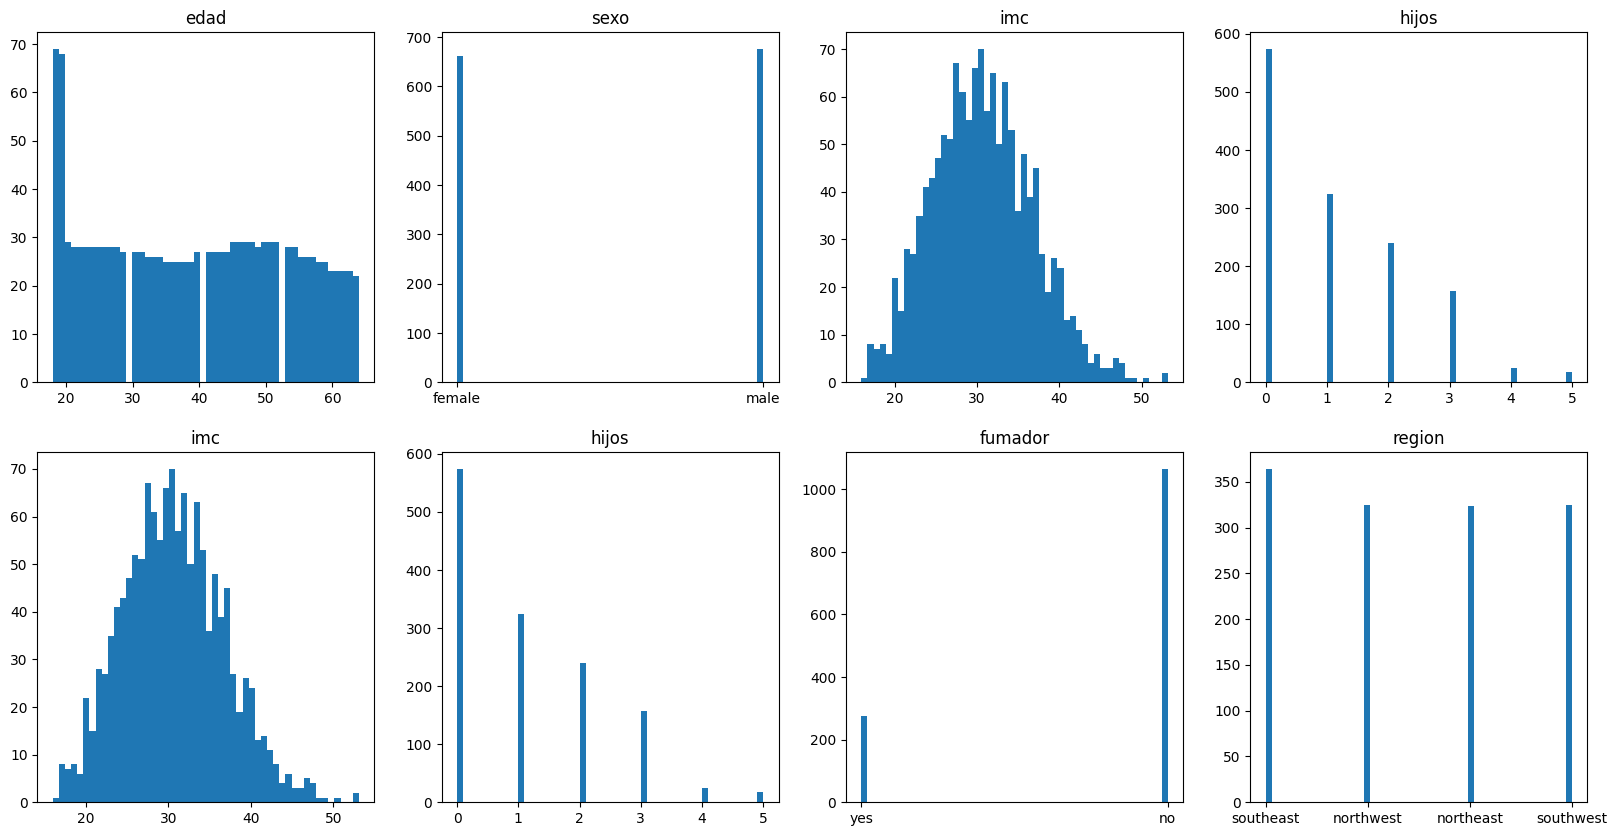

In [3]:
df_hist = df_ordenado
columns = df_hist.columns.to_list()

N_col = 4
N = len(columns)
N_rows = int(np.ceil(N/N_col))

fig, ax = plt.subplots(N_rows, N_col, figsize=(5*N_col, 5*N_rows))

for i in range(N_rows):
    for j in range(N_col):
        ax[i,j].hist(df_hist[columns[i*N_rows+j]], bins=50)
        ax[i,j].set_title(columns[i*N_rows+j])

#### Variables categóricas
Identifico las variables categóricas y las convierto en numéricas.

In [4]:
# convierto "sexo", "región" y "fumador" de variables categoricas a numéricas
matriz_dataframe = df_ordenado.iloc[:,:].values
le = LabelEncoder()

matriz_dataframe[:,1] = le.fit_transform(matriz_dataframe[:,1])
matriz_dataframe[:,3] = le.fit_transform(matriz_dataframe[:,3])
matriz_dataframe[:,4] = le.fit_transform(matriz_dataframe[:,4])

df_ordenado["sexo"] = matriz_dataframe[:,1]
df_ordenado["region"] = matriz_dataframe[:,3]
df_ordenado["fumador"] = matriz_dataframe[:,4]

# # convierto "sexo", "región" y "fumador" de variables categoricas a numéricas (otra manera)
# df_ordenado["sexo"] = df_ordenado["sexo"].astype('category').cat.codes
# df_ordenado["fumador"] = df_ordenado["fumador"].astype('category').cat.codes
# df_ordenado["region"] = df_ordenado["region"].astype('category').cat.codes

df_ordenado.head()

,edad,sexo,imc,hijos,fumador,region,gasto
543,54,0,47.410,0,1,0,63770.42801
1300,45,1,30.360,0,1,0,62592.87309
1230,52,1,34.485,3,1,3,60021.39897
577,31,0,38.095,1,1,1,58571.07448
819,33,0,35.530,0,1,0,55135.40209


#### Valores nulos
Verifico cantidad de valores nulos por columna.

In [5]:
df_ordenado.isnull().sum()

edad       0
sexo       0
imc        0
hijos      0
fumador    0
region     0
gasto      0
dtype: int64

#### Completo datos
En este caso, todos los datos están completos. Pero de ser necesario, se puede activar el bloque de código comentado.
Además, se muestra información estadística.

In [6]:
# # completo valores nulos mediante readondeo
# from sklearn.impute import SimpleImputer
# si = SimpleImputer(missing_values=np.nan, strategy="mean")
# matriz_dataframe = si.fit_transform(matriz_dataframe)
# df_ordenado = pd.DataFrame(matriz_dataframe)
# df_ordenado.columns = ['edad', 'sexo', 'imc', 'hijos','fumador', 'region', 'gasto']

# muestro info estadística
df_ordenado.describe()

,edad,imc,hijos,gasto
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### OneHotEncoding
Convierto las variables categóricas, que previamente las hice numéricas, a variables ficticias/dummy.

In [7]:
# convierto "sexo", "región" y "fumador" de variables categoricas a ficticias/dummy
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
matriz_dataframe = ct.fit_transform(matriz_dataframe)

df_ordenado = pd.DataFrame(matriz_dataframe)
df_ordenado.columns = [
    'mujer',
    'hombre',
    'no fuma',
    'fuma',
    'northeast',
    'northwest',
    'southeast',
    'southwest',
    'edad',
    'imc',
    'hijos',
    'gasto'
]

df_ordenado.head()

,mujer,hombre,no fuma,fuma,northeast,northwest,southeast,southwest,edad,imc,hijos,gasto
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,54,47.41,0,63770.42801
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,45,30.36,0,62592.87309
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,52,34.485,3,60021.39897
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,31,38.095,1,58571.07448
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,33,35.53,0,55135.40209


#### Matriz de correlación
Esta matriz muestra la relación estadística entre pares de variables en un conjunto de datos. Es útil para encontrar patrones y determinar qué variables están fuertemente relacionadas entre sí, qué variables pueden estar influenciando otras y qué variables pueden ser redundantes en un análisis.

<Axes: title={'center': 'Matriz de correlación'}>

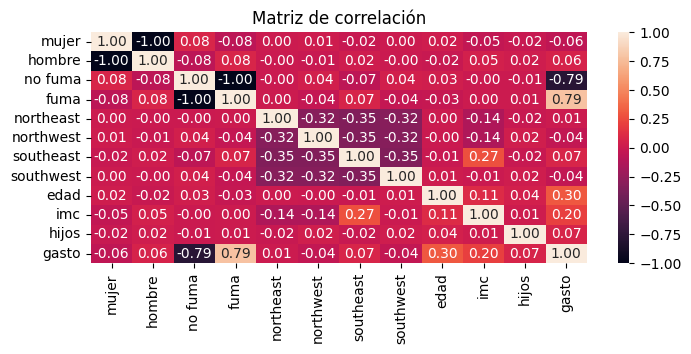

In [8]:
matriz_corr = df_ordenado.corr()

plt.subplots(figsize=(8,3))
plt.title('Matriz de correlación')
sns.heatmap(matriz_corr, annot=True, fmt='.2f')

#### Valor de correlación
En este bloque se muestra detalladamente los valores de correlación de cada par de variables formado con nuestra variable a predecir.

In [9]:
# obtengo variables más relacionadas con 'gasto'
matriz_corr['gasto'].abs().sort_values(ascending=False)

gasto        1.000000
fuma         0.787251
no fuma      0.787251
edad         0.299008
imc          0.198341
southeast    0.073982
hijos        0.067998
hombre       0.057292
mujer        0.057292
southwest    0.043210
northwest    0.039905
northeast    0.006349
Name: gasto, dtype: float64

#### Preparación de datos
Segmento el dataset para usar el 80% en entrenamiento y el 20% en test. Y escalo los valores para que ninguno predomine sobre otro por su diferencia absoluta.

In [10]:
# obtengo matriz de variables independientes (matriz_x) y dependientes (matriz_y)
matriz_x = matriz_dataframe[:,:11]
matriz_y = matriz_dataframe[:,11]

# separo los datos 80-20 para entrenamiento y validación respectivamente
x_train, x_test, y_train, y_test = train_test_split(matriz_x, matriz_y, test_size=0.2, random_state=0)

# escalo los valores
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# entreno al algoritmo de regresión lineal múltiple
lr = LinearRegression()
lr.fit(x_train, y_train)

# obtengo 'x', 'c', 'm' (y = mx + c)
c = lr.intercept_ # valor de la ordenada al origen
m = lr.coef_ # valores que puede tomar la pendiente
x = df_ordenado.index # valores que pueden tomas las variables independientes

#### Machine Learning
Preparo al algoritmo de predicción.

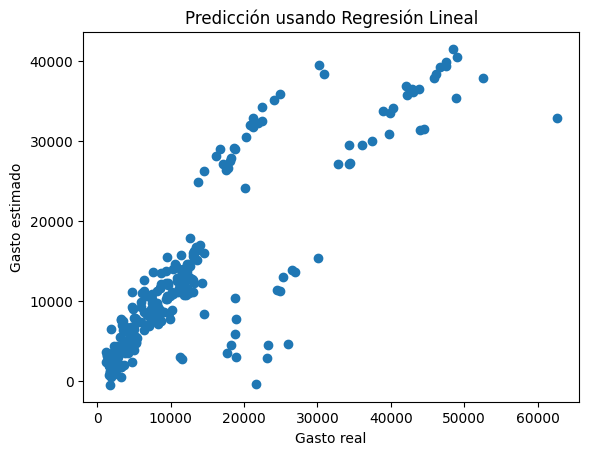

,real,estimado
0,10806.839,12485.081580
1,10264.4421,10790.097121
2,10965.446,11044.540825
3,4433.9159,6298.723717
4,25333.33284,12919.306678


In [11]:
# entreno al algoritmo de regresión lineal múltiple
lr.fit(x_train, y_train)

# realizo la predicción
y_pred_test = lr.predict(x_test)

plt.scatter(y_test, y_pred_test)
plt.title("Predicción usando Regresión Lineal")
plt.xlabel("Gasto real")
plt.ylabel("Gasto estimado")
plt.show()

# diferencia entre el valor real y el estimado
df_test = pd.DataFrame({'real': y_test, 'estimado': y_pred_test})
df_test.head()

#### Resultados
En el gráfico se muestra una comparación entre los valores reales y los estimados por el algoritmo. El gráfico será nuevo cada vez que se corre el código debido a `df_random = df_resultados.sample(n=30)` (elige 30 valores aleatorios del dataframe).

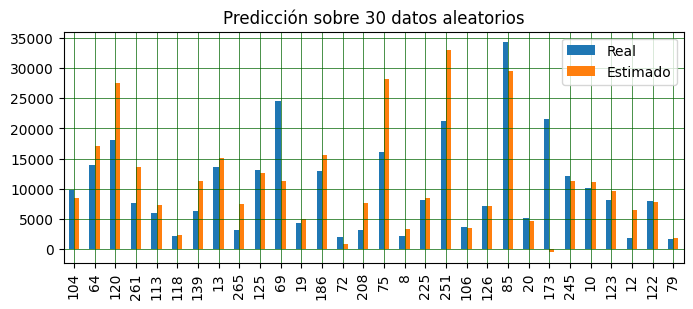

In [12]:
df_resultados = pd.DataFrame({'Real': y_test, 'Estimado': y_pred_test})
df_random = df_resultados.sample(n=30)

df_random.plot(kind='bar', figsize=(8,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='darkgreen')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Predicción sobre 30 datos aleatorios")
plt.show()

#### Métricas
Valores importantes para analizar la performance del modelo de predicción.

In [13]:
# metricas
r2 = metrics.r2_score(y_test, y_pred_test)
r2_adj = r2 - (y_test.shape[0] - 1) / (y_test.shape[0] - 2 - 1) * (1 - r2)

print("METRICAS")
print('Error absoluto mediano:', metrics.median_absolute_error(y_test, y_pred_test))
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred_test)) 
print('Raíz del error cuadrático medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Promedio de variable independiente (MIV):', df_ordenado["gasto"].mean())
print('r2:', r2)
print('r2 ajustado:', r2_adj)

# [RMSE > MIV * 0.1] -> [modelo impreciso]
# [RMSE < MIV * 0.1] -> [modelo preciso]

METRICAS
Error absoluto mediano: 2021.7581694624423
Error absoluto medio: 4051.0755020115653
Error cuadrático medio: 38375321.30392089
Raíz del error cuadrático medio (RMSE): 6194.781780169572
Promedio de variable independiente (MIV): 13270.422265141267
r2: 0.7526851923190874
r2 ajustado: 0.5035038577877528


#### Conclusión
Se puede ver que el valor de la raíz del error cuadrático medio es superior al 10% del valor de la media que es de 13270.
Esto significa que nuestro algoritmo no fue muy preciso pero aún así puede hacer predicciones razonablemente buenas.

Factores que pueden haber contribuido a esta inexactitud:
- Necesita más datos: A mas datos, mas precisión y exactitud.
- Malas suposiciones: Puede que la relación entre los datos no sea lineal